# Preprocessing

## Data Reading & Inspection

In [ ]:
!git clone -l -s https://github.com/asyrofist/tugasPKPL.git cloned_pkpl
%cd cloned_pkpl
!ls

Cloning into 'cloned_pkpl'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 54 (delta 23), reused 12 (delta 3), pack-reused 0
Unpacking objects: 100% (54/54), done.
/content/cloned_pkpl
nltk  PKPL.ipynb  README.md  sklearn  srs2.csv	srs3.csv  TPOT.ipynb


In [ ]:
import pandas as pd
from time import time

print("Loading Dataset...")
t0 = time()
dataset2 = pd.read_csv('/content/cloned_pkpl/srs2.csv')
print("done in %0.3fs." % (time() - t0))
dataset2.head(n = 100)

Loading Dataset...
done in 0.016s.


,ID,Requirement Statement
0,F01,Users can create a new diary.
1,F02,Users can add titles to the diary.
2,F03,Users can add weather to the diary.
3,F04,Users can add dates to the diary.
4,F06,Users can add hours to the diary.
5,F07,Users can add seconds to the diary.
6,F08,Users can save diaries.
7,F09,Users can add photos to the diary.
8,F10,Users can read the diary that has been created.
9,F11,Users can share diaries in the form of postcards.


In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
import re 

nltk.download('stopwords')
nltk.download('punkt')

stemming = PorterStemmer()
stops = set(stopwords.words("english"))

# cleaning text
def text_cleaning(raw):
  
  # lowering word
  lower_case = raw.lower()

  # hapus punctuatioation & lower
  hasil_punctuation = lower_case.translate(str.maketrans("","",string.punctuation))
  
  # hapus whitespace
  hasil_whitespace = hasil_punctuation.strip()

  # hapus angka
  hasil_hapusangka = re.sub(r"\d+", "", hasil_whitespace)
  
  # tokenisasi 
  tokens = nltk.tokenize.word_tokenize(hasil_hapusangka)
  
  # Stemming
  stemmed_words = [stemming.stem(w) for w in tokens]
  
  # Remove stop words
  meaningful_words = [w for w in stemmed_words if not w in stops]
  
  # Rejoin meaningful stemmed words
  joined_words = ( " ".join(meaningful_words))
  
  # Return cleaned data
  return joined_words  

# applying
def apply_cleaning(hasil):
    cleaned_hasil = []
    for element in hasil:
        cleaned_hasil.append(text_cleaning(element))
    return cleaned_hasil

# Load data example (dari functional maupun nonfunctional)
statement = dataset2

# Truncate data for example
statement = statement.head(100)

# Get text to clean (dari row yang diinginkan)
text_to_clean = list(statement['Requirement Statement'])

# Clean text
print("Loading Original & Cleaned Text...")
t0 = time()
cleaned_text = apply_cleaning(text_to_clean)

# Show first example
print("done in %0.3fs." % (time() - t0))
pd.DataFrame([text_to_clean, cleaned_text],index=['ORIGINAL','CLEANED'], columns= statement['ID'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Loading Original & Cleaned Text...
done in 0.018s.


ID,F01,F02,F03,F04,F06,F07,F08,F09,F10,F11,F12,F13,F14,F15,F16,F17,F18,NF01,NF02,NF03,NF04,NF05,NF06,NF07,NF08,NF09
ORIGINAL,Users can create a new diary.,Users can add titles to the diary.,Users can add weather to the diary.,Users can add dates to the diary.,Users can add hours to the diary.,Users can add seconds to the diary.,Users can save diaries.,Users can add photos to the diary.,Users can read the diary that has been created.,Users can share diaries in the form of postcards.,Users can save postcards.,Users can change the postcard background color.,Users can change the color of posts on the pos...,Users can delete the diary.,Users can edit the diary that has been created.,Users can open a calendar that contains a diary.,The system can open a diary editor.,The application has a high level of availabili...,Applications must have a high degree of flexib...,This application must have a high level of int...,This application has a high usability aspect a...,This application must have a response time val...,Applications must have a high level of interop...,Documentation must be included in the system s...,The application must have a high degree of fle...,The modules in the system will be designed and...
CLEANED,user creat new diari,user add titl diari,user add weather diari,user add date diari,user add hour diari,user add second diari,user save diari,user add photo diari,user read diari ha creat,user share diari form postcard,user save postcard,user chang postcard background color,user chang color post postcard,user delet diari,user edit diari ha creat,user open calendar contain diari,system open diari editor,applic ha high level avail oper continu seven ...,applic must high degre flexibilitywhich must a...,thi applic must high level integr data secur i...,thi applic ha high usabl aspect easi use inter...,thi applic must respons time valu quit good fa...,applic must high level interoperabilitybecaus ...,document must includ system sourc code develop...,applic must high degre flexibilityand use user...,modul system design program structur way conti...


# Bag of Words

### Implementing Bag of Words in scikit-learn

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(cleaned_text)

print("Loading Counting Vector...")
t0 = time()

print(count_vector)
print("done in %0.3fs." % (time() - t0))

Loading Counting Vector...
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8',
                input=['user creat new diari', 'user add titl diari',
                       'user add weather diari', 'user add date diari',
                       'user add hour diari', 'user add second diari',
                       'user save diari', 'user add photo diari',
                       'user read diari ha creat',
                       'user share diari form postcard', 'user save postcard',
                       'user...
                       'chang addit sourc code made high level maintain',
                       'applic must high degre flexibilityand use user age '
                       'seven year abov',
                       'modul system design program structur way continu use '
                       'system developmentso reusabl level high'],
                lowercase=True, max_df=1.0, max_features=Non

In [ ]:
print("Loading feature names...")
t0 = time()

count_vector.fit(cleaned_text)
print(count_vector.get_feature_names())
print("done in %0.3fs." % (time() - t0))

Loading feature names...
['abl', 'abov', 'access', 'add', 'addit', 'age', 'android', 'applic', 'aspect', 'avail', 'background', 'calendar', 'chang', 'code', 'color', 'connect', 'contain', 'continu', 'creat', 'data', 'date', 'day', 'degre', 'delet', 'design', 'develop', 'developmentso', 'devic', 'diari', 'document', 'easi', 'edit', 'editor', 'extend', 'facebook', 'fast', 'flexibilityand', 'flexibilitywhich', 'form', 'good', 'ha', 'high', 'hour', 'hoursth', 'includ', 'integr', 'interfac', 'interoperabilitybecaus', 'introduc', 'kitkat', 'less', 'level', 'lineinstagramand', 'made', 'maintain', 'media', 'minut', 'modul', 'must', 'need', 'new', 'one', 'open', 'oper', 'password', 'per', 'perform', 'photo', 'post', 'postcard', 'program', 'quit', 'read', 'reread', 'respons', 'result', 'reusabl', 'run', 'save', 'second', 'secur', 'seven', 'share', 'social', 'sourc', 'stop', 'structur', 'system', 'thi', 'three', 'time', 'titl', 'toler', 'two', 'usabl', 'use', 'user', 'valu', 'version', 'way', 'we

In [ ]:
print("Loading Document array...")
t0 = time()

doc_array = count_vector.transform(cleaned_text).toarray()
print(doc_array)
print("done in %0.3fs." % (time() - t0))

Loading Document array...
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
done in 0.001s.


<function matplotlib.pyplot.show>

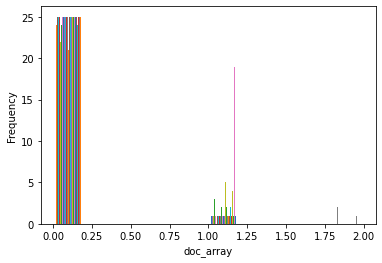

In [ ]:
plt.hist(doc_array)
plt.xlabel('doc_array')
plt.ylabel('Frequency')
plt.show

In [ ]:
print("Loading frequency matrix...")
t0 = time()

frequency_matrix = pd.DataFrame(doc_array,index=cleaned_text,columns=count_vector.get_feature_names())
print("done in %0.3fs." % (time() - t0))
frequency_matrix

Loading frequency matrix...
done in 0.001s.


,abl,abov,access,add,addit,age,android,applic,aspect,avail,background,calendar,chang,code,color,connect,contain,continu,creat,data,date,day,degre,delet,design,develop,developmentso,devic,diari,document,easi,edit,editor,extend,facebook,fast,flexibilityand,flexibilitywhich,form,good,...,password,per,perform,photo,post,postcard,program,quit,read,reread,respons,result,reusabl,run,save,second,secur,seven,share,social,sourc,stop,structur,system,thi,three,time,titl,toler,two,usabl,use,user,valu,version,way,weather,week,without,year
user creat new diari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user add titl diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
user add weather diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
user add date diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user add hour diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user add second diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user save diari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user add photo diari,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user read diari ha creat,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
user share diari form postcard,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Visualisasi

Loading Visualisation...


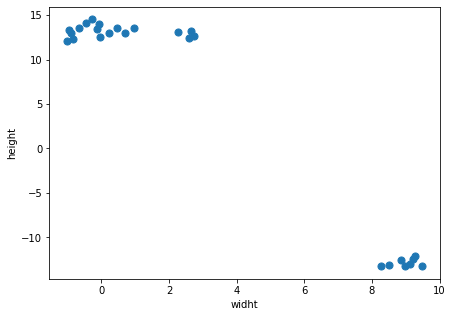

done in 5.967s.


In [ ]:
import umap

print("Loading Visualisation...")
t0 = time()

visualisasi_bow = doc_array
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(visualisasi_bow)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.xlabel('widht')
plt.ylabel('height')
plt.show()

print("done in %0.3fs." % (time() - t0))

# Term Frequency - Inverse Document Frequency

### Feature Generation using TF-IDF

In [ ]:
import numpy as np
import math

def l2_normalizer(vec):
    denom = np.sum([el**2 for el in vec])
    return [(el / math.sqrt(denom)) for el in vec]

doc_term_matrix_l2 = []
for vec in doc_array:
    doc_term_matrix_l2.append(l2_normalizer(vec))

print ('A regular old document term matrix: ') 
print (np.matrix(doc_array))
print ('\nA document term matrix with row-wise L2 norms of 1:')
print (np.matrix(doc_term_matrix_l2))

A regular old document term matrix: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]

A document term matrix with row-wise L2 norms of 1:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.30151134 0.         ... 0.         0.         0.30151134]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<function matplotlib.pyplot.show>

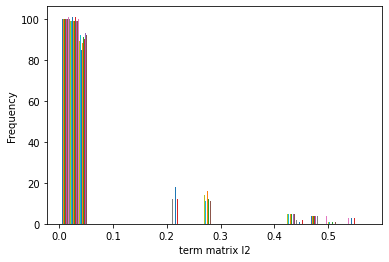

In [ ]:
plt.hist(doc_term_matrix_l2)
plt.xlabel('term matrix l2')
plt.ylabel('Frequency')
plt.show

In [ ]:
import string #allows for format()
    
def build_lexicon(corpus):
    lexicon = set()
    for doc in corpus:
        lexicon.update([word for word in doc.split()])
    return lexicon

def freq(term, document):
  return document.split().count(term)

def numDocsContaining(word, doclist):
    doccount = 0
    for doc in doclist:
        if freq(word, doc) > 0:
            doccount +=1
    return doccount 

def idf(word, doclist):
    n_samples = len(doclist)
    df = numDocsContaining(word, doclist)
    return np.log(n_samples / 1+df)

vocabulary = build_lexicon(cleaned_text)
mydoclist = cleaned_text

my_idf_vector = [idf(word, mydoclist) for word in vocabulary]

print ('Our vocabulary vector is [' + ', '.join(list(vocabulary)) + ']')
print ('The inverse document frequency vector is [' + ', '.join(format(freq, 'f') for freq in my_idf_vector) + ']')

Our vocabulary vector is [document, maintain, program, facebook, color, reusabl, reread, valu, abov, per, made, develop, postcard, without, extend, second, perform, two, quit, background, read, fast, user, date, weather, applic, high, addit, design, thi, abl, seven, devic, diari, year, connect, sourc, good, save, social, less, stop, level, flexibilitywhich, way, post, use, three, secur, includ, minut, system, android, result, add, week, delet, contain, time, titl, modul, day, password, developmentso, form, code, media, photo, new, hoursth, one, creat, access, ha, need, editor, avail, continu, must, edit, interfac, interoperabilitybecaus, hour, degre, data, oper, calendar, structur, version, usabl, kitkat, flexibilityand, toler, introduc, respons, run, chang, share, open, aspect, lineinstagramand, integr, easi, age]
The inverse document frequency vector is [3.295837, 3.295837, 3.295837, 3.295837, 3.332205, 3.295837, 3.295837, 3.295837, 3.332205, 3.295837, 3.295837, 3.295837, 3.401197, 3

In [ ]:
import numpy as np

def build_idf_matrix(idf_vector):
    idf_mat = np.zeros((len(idf_vector), len(idf_vector)))
    np.fill_diagonal(idf_mat, idf_vector)
    return idf_mat

my_idf_matrix = build_idf_matrix(my_idf_vector)
my_idf_matrix

array([[3.29583687, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.29583687, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.29583687, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.29583687, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 3.29583687,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        3.29583687]])

In [ ]:
doc_term_matrix_tfidf = []

#performing tf-idf matrix multiplication
for tf_vector in doc_array:
    doc_term_matrix_tfidf.append(np.dot(tf_vector, my_idf_matrix))

#normalizing
doc_term_matrix_tfidf_l2 = []
for tf_vector in doc_term_matrix_tfidf:
    doc_term_matrix_tfidf_l2.append(l2_normalizer(tf_vector))
                                    
print (vocabulary)
print (np.matrix(doc_term_matrix_tfidf_l2))

# np.matrix() just to make it easier to look at

{'document', 'maintain', 'program', 'facebook', 'color', 'reusabl', 'reread', 'valu', 'abov', 'per', 'made', 'develop', 'postcard', 'without', 'extend', 'second', 'perform', 'two', 'quit', 'background', 'read', 'fast', 'user', 'date', 'weather', 'applic', 'high', 'addit', 'design', 'thi', 'abl', 'seven', 'devic', 'diari', 'year', 'connect', 'sourc', 'good', 'save', 'social', 'less', 'stop', 'level', 'flexibilitywhich', 'way', 'post', 'use', 'three', 'secur', 'includ', 'minut', 'system', 'android', 'result', 'add', 'week', 'delet', 'contain', 'time', 'titl', 'modul', 'day', 'password', 'developmentso', 'form', 'code', 'media', 'photo', 'new', 'hoursth', 'one', 'creat', 'access', 'ha', 'need', 'editor', 'avail', 'continu', 'must', 'edit', 'interfac', 'interoperabilitybecaus', 'hour', 'degre', 'data', 'oper', 'calendar', 'structur', 'version', 'usabl', 'kitkat', 'flexibilityand', 'toler', 'introduc', 'respons', 'run', 'chang', 'share', 'open', 'aspect', 'lineinstagramand', 'integr', 'easi

In [ ]:
hasil_tfidf = np.matrix(doc_term_matrix_tfidf_l2)
print (hasil_tfidf)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.29646275 0.         ... 0.         0.         0.29646275]
 [0.         0.         0.         ... 0.         0.         0.        ]]


<function matplotlib.pyplot.show>

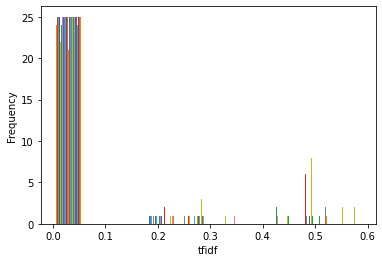

In [ ]:
plt.hist(hasil_tfidf)
plt.xlabel('tfidf')
plt.ylabel('Frequency')
plt.show

In [ ]:
print("Loading frequency matrix...")
t0 = time()

frequency_TFIDF = pd.DataFrame(hasil_tfidf,index=cleaned_text,columns=count_vector.get_feature_names())
print("done in %0.3fs." % (time() - t0))
frequency_TFIDF

Loading frequency matrix...
done in 0.001s.


,abl,abov,access,add,addit,age,android,applic,aspect,avail,background,calendar,chang,code,color,connect,contain,continu,creat,data,date,day,degre,delet,design,develop,developmentso,devic,diari,document,easi,edit,editor,extend,facebook,fast,flexibilityand,flexibilitywhich,form,good,...,password,per,perform,photo,post,postcard,program,quit,read,reread,respons,result,reusabl,run,save,second,secur,seven,share,social,sourc,stop,structur,system,thi,three,time,titl,toler,two,usabl,use,user,valu,version,way,weather,week,without,year
user creat new diari,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497283,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user add titl diari,0.000000,0.000000,0.000000,0.497283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497283,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497283,0.000000,0.000000,0.000000,0.000000,0.508065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user add weather diari,0.000000,0.000000,0.000000,0.497283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497283,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508065,0.000000,0.000000,0.000000,0.497283,0.000000,0.000000,0.000000
user add date diari,0.000000,0.000000,0.000000,0.497283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.497283,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.508065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
user add hour diari,0.000000,0.000000,0.000000,0.492102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492102,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000

### Visualisation

Loading Topic Visualisation...


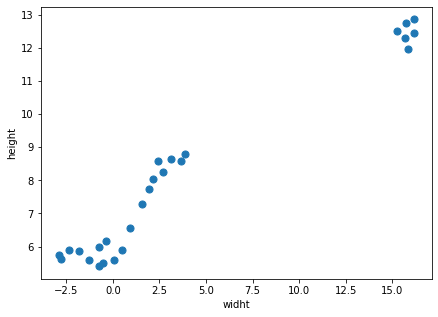

done in 1.022s.


In [ ]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

visual_tfidf = hasil_tfidf
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(visual_tfidf)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.xlabel('widht')
plt.ylabel('height')
plt.show()

print("done in %0.3fs." % (time() - t0))

# Cosine SImilarity

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
X = np.array(visual_tfidf[0:])
Y = np.array(visual_tfidf)
print("X",X)
print("y",Y)

X [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.29646275 0.         ... 0.         0.         0.29646275]
 [0.         0.         0.         ... 0.         0.         0.        ]]
y [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.29646275 0.         ... 0.         0.         0.29646275]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
cosine_similaritas = pairwise_kernels(X, Y, metric='linear')
cosine_similaritas

array([[1.        , 0.50541977, 0.50541977, 0.50541977, 0.50015444,
        0.50541977, 0.57269296, 0.50541977, 0.67397514, 0.45057401,
        0.29248764, 0.22965476, 0.22915762, 0.58255698, 0.67249742,
        0.45255199, 0.24864137, 0.        , 0.        , 0.13334684,
        0.42746079, 0.        , 0.        , 0.        , 0.15388796,
        0.        ],
       [0.50541977, 1.        , 0.75270988, 0.75270988, 0.74486836,
        0.75270988, 0.57269296, 0.75270988, 0.45255199, 0.45057401,
        0.29248764, 0.22965476, 0.22915762, 0.58255698, 0.45155975,
        0.45255199, 0.24864137, 0.        , 0.        , 0.13334684,
        0.21604713, 0.        , 0.        , 0.        , 0.15388796,
        0.        ],
       [0.50541977, 0.75270988, 1.        , 0.75270988, 0.74486836,
        0.75270988, 0.57269296, 0.75270988, 0.45255199, 0.45057401,
        0.29248764, 0.22965476, 0.22915762, 0.58255698, 0.45155975,
        0.45255199, 0.24864137, 0.        , 0.        , 0.13334684,
      

<function matplotlib.pyplot.show>

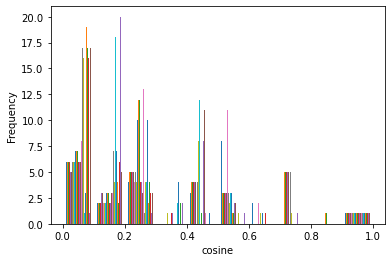

In [ ]:
plt.hist(cosine_similaritas)
plt.xlabel('cosine')
plt.ylabel('Frequency')
plt.show

In [ ]:
print("Loading frequency matrix...")
t0 = time()

frequency_cosine = pd.DataFrame(cosine_similaritas, index=dataset2['ID'],columns=dataset2['ID'])
print("done in %0.3fs." % (time() - t0))
frequency_cosine

Loading frequency matrix...
done in 0.001s.


ID,F01,F02,F03,F04,F06,F07,F08,F09,F10,F11,F12,F13,F14,F15,F16,F17,F18,NF01,NF02,NF03,NF04,NF05,NF06,NF07,NF08,NF09
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
F01,1.000000,0.505420,0.505420,0.505420,0.500154,0.505420,0.572693,0.505420,0.673975,0.450574,0.292488,0.229655,0.229158,0.582557,0.672497,0.452552,0.248641,0.000000,0.000000,0.133347,0.427461,0.000000,0.000000,0.000000,0.153888,0.000000
F02,0.505420,1.000000,0.752710,0.752710,0.744868,0.752710,0.572693,0.752710,0.452552,0.450574,0.292488,0.229655,0.229158,0.582557,0.451560,0.452552,0.248641,0.000000,0.000000,0.133347,0.216047,0.000000,0.000000,0.000000,0.153888,0.000000
F03,0.505420,0.752710,1.000000,0.752710,0.744868,0.752710,0.572693,0.752710,0.452552,0.450574,0.292488,0.229655,0.229158,0.582557,0.451560,0.452552,0.248641,0.000000,0.000000,0.133347,0.216047,0.000000,0.000000,0.000000,0.153888,0.000000
F04,0.505420,0.752710,0.752710,1.000000,0.744868,0.752710,0.572693,0.752710,0.452552,0.450574,0.292488,0.229655,0.229158,0.582557,0.451560,0.452552,0.248641,0.000000,0.000000,0.133347,0.216047,0.000000,0.000000,0.000000,0.153888,0.000000
F06,0.500154,0.744868,0.744868,0.744868,1.000000,0.744868,0.566727,0.744868,0.447837,0.445880,0.289441,0.227262,0.226770,0.576488,0.446856,0.447837,0.246051,0.118943,0.000000,0.131958,0.213796,0.000000,0.000000,0.000000,0.152285,0.000000
F07,0.505420,0.752710,0.752710,0.752710,0.744868,1.000000,0.572693,0.752710,0.452552,0.450574,0.292488,0.229655,0.229158,0.582557,0.451560,0.452552,0.248641,0.000000,0.000000,0.133347,0.216047,0.123041,0.000000,0.000000,0.153888,0.000000
F08,0.572693,0.572693,0.572693,0.572693,0.566727,0.572693,1.000000,0.572693,0.512788,0.510547,0.682498,0.260223,0.259659,0.660097,0.511664,0.512788,0.281736,0.000000,0.000000,0.151096,0.244804,0.000000,0.000000,0.000000,0.174371,0.000000
F09,0.505420,0.752710,0.752710,0.752710,0.744868,0.752710,0.572693,1.000000,0.452552,0.450574,0.292488,0.229655,0.229158,0.582557,0.451560,0.452552,0.248641,0.000000,0.000000,0.133347,0.216047,0.000000,0.000000,0.000000,0.153888,0.000000
F10,0.673975,0.452552,0.452552,0.452552,0.447837,0.452552,0.512788,0.452552,1.000000,0.403443,0.261893,0.205632,0.205187,0.521621,0.799980,0.405214,0.222633,0.099137,0.000000,0.119399,0.382748,0.000000,0.000000,0.000000,0.137791,0.000000


### Visual Cosine

Loading Topic Visualisation...


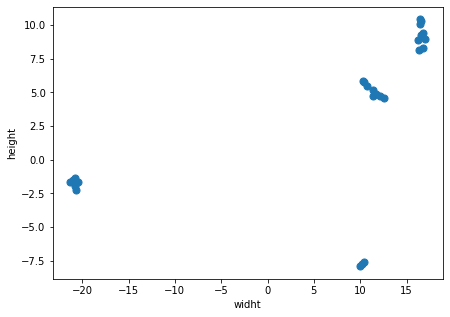

done in 0.809s.


In [ ]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

visual_cosine = cosine_similaritas
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(visual_cosine)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.xlabel('widht')
plt.ylabel('height')
plt.show()

print("done in %0.3fs." % (time() - t0))

## K-means Clustering VSM (BOW, TFIDF, Cosine)

In [ ]:
import numpy as np
XVSM = np.array(hasil_tfidf)
yVSM = np.array(cosine_similaritas)

In [ ]:
print("Loading Data X & Y...")
t0 = time()

print("X", XVSM, "\n")
print("Y", yVSM, "\n")

print("done in %0.3fs." % (time() - t0))

Loading Data X & Y...
X [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.29646275 0.         ... 0.         0.         0.29646275]
 [0.         0.         0.         ... 0.         0.         0.        ]] 

Y [[1.         0.50541977 0.50541977 0.50541977 0.50015444 0.50541977
  0.57269296 0.50541977 0.67397514 0.45057401 0.29248764 0.22965476
  0.22915762 0.58255698 0.67249742 0.45255199 0.24864137 0.
  0.         0.13334684 0.42746079 0.         0.         0.
  0.15388796 0.        ]
 [0.50541977 1.         0.75270988 0.75270988 0.74486836 0.75270988
  0.57269296 0.75270988 0.45255199 0.45057401 0.29248764 0.22965476
  0.22915762 0.58255698 0.45155975 0.45255199 0.24864137 0.
  0.         0.13334684 0.21604713 0.         0.   

In [ ]:
from sklearn.cluster import KMeans

print("Loading Kmeans...")
t0 = time()
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
print(kmeans.fit(XVSM))

print("done in %0.3fs." % (time() - t0))

Loading Kmeans...
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
done in 0.019s.


In [ ]:
print("Loading Data Correction...")
t0 = time()

correct = 0
for i in range(len(XVSM)):
    predict_me = np.array(XVSM[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == yVSM[i].all():
        correct += 1

print(correct/len(XVSM))

print("done in %0.3fs." % (time() - t0))

Loading Data Correction...
0.3076923076923077
done in 0.012s.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

print("Loading X Scaled...")
t0 = time()

scaler = MinMaxScaler()
XVSM_scaled = scaler.fit_transform(yVSM)

print(XVSM_scaled)

print("done in %0.3fs." % (time() - t0))

Loading X Scaled...
[[1.         0.50541977 0.50541977 0.50541977 0.50015444 0.50541977
  0.57269296 0.50541977 0.67397514 0.45057401 0.29248764 0.22965476
  0.22915762 0.58255698 0.67249742 0.45255199 0.24864137 0.
  0.         0.13334684 0.39926629 0.         0.         0.
  0.15388796 0.        ]
 [0.50541977 1.         0.75270988 0.75270988 0.74486836 0.75270988
  0.57269296 0.75270988 0.45255199 0.45057401 0.29248764 0.22965476
  0.22915762 0.58255698 0.45155975 0.45255199 0.24864137 0.
  0.         0.13334684 0.17744164 0.         0.         0.
  0.15388796 0.        ]
 [0.50541977 0.75270988 1.         0.75270988 0.74486836 0.75270988
  0.57269296 0.75270988 0.45255199 0.45057401 0.29248764 0.22965476
  0.22915762 0.58255698 0.45155975 0.45255199 0.24864137 0.
  0.         0.13334684 0.17744164 0.         0.         0.
  0.15388796 0.        ]
 [0.50541977 0.75270988 0.75270988 1.         0.74486836 0.75270988
  0.57269296 0.75270988 0.45255199 0.45057401 0.29248764 0.22965476
 

### Visual Kmeans Clustering

Loading Topic Visualisation...


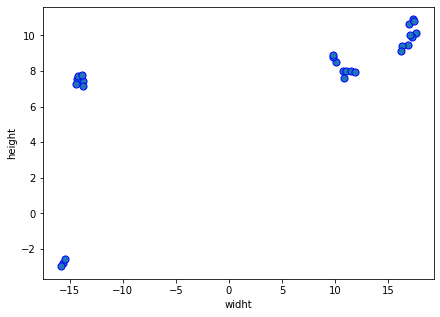

done in 0.803s.


In [ ]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

kmeans_VSM = XVSM_scaled
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(kmeans_VSM)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors='Blue')
plt.xlabel('widht')
plt.ylabel('height')
plt.show()

print("done in %0.3fs." % (time() - t0))

### Splitting data

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, kmeans_VSM, test_size=0.3,random_state=109) # 70% training and 30% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 104), (8, 104), (18, 26), (8, 26))

In [ ]:
y_train = np.argmax(y_train, axis=1)

### Model Classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_predLR = clf.predict(X_test)

# Decision Tree
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
y_predDT = Dt.predict(X_test)

# Decision Tree Regressor
Dtr = DecisionTreeRegressor()
Dtr.fit(X_train, y_train)
y_predDTR = Dtr.predict(X_test)

# Gaussian Naive Bias
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predGNB = gnb.predict(X_test)

# random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predRFC = rfc.predict(X_test)

# random forest regressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
y_predRFR = rfr.predict(X_test)

# Support vector classifier
ppn = SVC(C=1, random_state = 0)
ppn.fit(X_train,y_train)
y_predSVC = ppn.predict(X_test)

# support vector regression
svm = SVR(C = 2, kernel = 'rbf', degree = 2)
svm.fit(X_train, y_train)
y_predSVR = svm.predict(X_test)

# k neearest neighbor classifier
Knn = KNeighborsClassifier(n_neighbors = 2, p =2, metric = 'minkowski')
Knn = Knn.fit(X_train,y_train)
y_predKNN = Knn.predict(X_test)

In [ ]:
print("prediksi logistic regression", y_predLR)
print("prediksi Decision Tree", y_predDT)
print("prediksi Decision Tree Regression", y_predDTR)
print("prediksi Gaussian Naive Bias", y_predGNB)
print("prediksi random forest classifer", y_predRFC)
print("prediksi random forest regressor", y_predRFR)
print("prediksi support vector classifer", y_predSVC)
print("prediksi support vector regression", y_predSVR)
print("prediksi k nearest neighbor classifer", y_predKNN)

prediksi logistic regression [ 0 24 11  0  3 21 25 19]
prediksi Decision Tree [ 0 24 11  0  6 11 11 11]
prediksi Decision Tree Regression [ 9. 24. 11.  9.  2. 24. 16. 19.]
prediksi Gaussian Naive Bias [ 0 24 11  0  1  0 19 19]
prediksi random forest classifer [ 0 24 11  0  3  4 19 19]
prediksi random forest regressor [ 9.59 19.74 11.29 10.13  3.   19.64 17.99 19.38]
prediksi support vector classifer [ 0 24 11  0  5  0 19 19]
prediksi support vector regression [ 9.87352192 13.20041381 11.14640452  9.86494133  7.39004161 11.91608436
 12.67811855 13.05675104]
prediksi k nearest neighbor classifer [ 0 19 10  0  2  0 19 19]


### Model Evaluation

In [ ]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

actual = [ 0, 24, 11,  0,  2, 0, 25, 19]
predicted = y_predSVC
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results,'\n') 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 

print ('Report : ')
print (classification_report(actual, predicted)) 

Confusion Matrix :
[[3 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]] 

Accuracy Score : 0.75
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
          11       1.00      1.00      1.00         1
          19       0.50      1.00      0.67         1
          24       1.00      1.00      1.00         1
          25       0.00      0.00      0.00         1

    accuracy                           0.75         8
   macro avg       0.50      0.57      0.52         8
weighted avg       0.69      0.75      0.71         8



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Latent Semantic Analysis

### Document Term Matrix

In [ ]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer

print("Loading Document matrix term matrix...")
t0 = time()

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)
X = vectorizer.fit_transform(cleaned_text)
print(X.shape) # check shape of the document-term matrix
print("done in %0.3fs." % (time() - t0))

Loading Document matrix term matrix...
(26, 93)
done in 0.011s.


In [ ]:
print(X)

  (0, 56)	0.7656187292181281
  (0, 18)	0.6432946148308866
  (1, 83)	0.8375737369732849
  (1, 3)	0.546324294840168
  (2, 90)	0.8375737369732849
  (2, 3)	0.546324294840168
  (3, 20)	0.8375737369732849
  (3, 3)	0.546324294840168
  (4, 41)	0.805768114051409
  (4, 3)	0.5922311595804763
  (5, 73)	0.805768114051409
  (5, 3)	0.5922311595804763
  (6, 72)	1.0
  (7, 61)	0.8375737369732849
  (7, 3)	0.546324294840168
  (8, 39)	0.5130898243327779
  (8, 66)	0.688097132919705
  (8, 18)	0.5130898243327779
  (9, 63)	0.4870826174343147
  (9, 37)	0.579702621453368
  (9, 76)	0.6532192545182897
  (10, 63)	0.6432946148308866
  (10, 72)	0.7656187292181281
  (11, 14)	0.5127301086919458
  (11, 10)	0.5777534324912074
  :	:
  (23, 28)	0.25597118360918264
  (23, 43)	0.22716287851035757
  (23, 49)	0.17791475565921835
  (23, 40)	0.1491064505603933
  (23, 12)	0.20672306075804345
  (24, 92)	0.3881763061742992
  (24, 5)	0.3881763061742992
  (24, 35)	0.3881763061742992
  (24, 1)	0.34448896097110665
  (24, 86)	0.28944941

### Topic Modelling

In [ ]:
from sklearn.decomposition import TruncatedSVD

print("Loading Topic Modelling...")
t0 = time()

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
print(len(svd_model.components_))
print("done in %0.3fs." % (time() - t0))

Loading Topic Modelling...
20
done in 0.057s.


In [ ]:
print(svd_model.components_)

[[ 3.13451948e-03  6.88350778e-03  1.04130496e-02 ...  2.06247695e-01
   1.24442311e-02  4.62193987e-03]
 [ 2.56435442e-02  5.55499806e-02  1.09247139e-02 ... -1.31262699e-02
   3.05536061e-02  3.69511648e-02]
 [ 3.57652406e-02  7.73560119e-02  1.50072894e-02 ... -1.74403555e-02
   4.35789082e-02  5.14008936e-02]
 ...
 [ 1.07476301e-02  4.97056991e-03 -2.30400615e-03 ...  7.34066690e-03
   3.96725368e-04 -5.14670331e-03]
 [-2.57774455e-01  6.78116362e-02  2.15504328e-03 ...  3.33721650e-02
   5.89974262e-04  3.34185816e-01]
 [-1.20527608e-15  3.17549545e-16 -9.55736860e-16 ...  1.11292670e-16
  -1.05371133e-16  1.77516083e-15]]


<function matplotlib.pyplot.show>

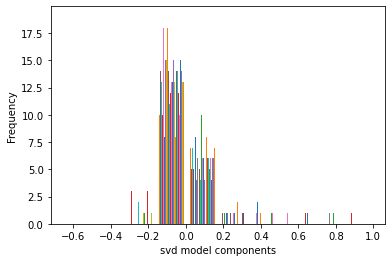

In [ ]:
plt.hist(svd_model.components_)
plt.xlabel('svd model components')
plt.ylabel('Frequency')
plt.show

In [ ]:
print("Loading LSA Result...")
t0 = time()

terms = vectorizer.get_feature_names()
hasil_LSA = []
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("\nTopic "+str(i)+": ")
    # hasil_LSA.append(i)
    for t in sorted_terms:
        # print(t[0] + "\n")
        print(t[0])
        hasil_LSA.append(t)
print("done in %0.3fs." % (time() - t0))

Loading LSA Result...

Topic 0: 
add
hour
second
date
titl
weather
photo

Topic 1: 
postcard
save
color
creat
chang
ha
applic

Topic 2: 
creat
ha
applic
new
high
edit
read

Topic 3: 
creat
ha
edit
read
new
save
add

Topic 4: 
save
applic
use
degre
abov
seven
age

Topic 5: 
open
editor
calendar
contain
use
save
degre

Topic 6: 
thi
second
secur
form
access
extend
fast

Topic 7: 
level
code
sourc
hour
day
secur
includ

Topic 8: 
delet
code
sourc
second
chang
save
addit

Topic 9: 
form
share
secur
postcard
data
integr
password

Topic 10: 
code
sourc
new
addit
develop
document
maintain

Topic 11: 
design
developmentso
modul
program
reusabl
structur
way

Topic 12: 
applic
connect
facebook
interoperabilitybecaus
lineinstagramand
media
need

Topic 13: 
new
hour
day
aspect
easi
hoursth
interfac

Topic 14: 
titl
date
share
editor
postcard
code
sourc

Topic 15: 
date
photo
contain
calendar
secur
integr
password

Topic 16: 
weather
date
share
sourc
code
postcard
connect

Topic 17: 
secur
data
int

In [ ]:
print(hasil_LSA)

[('add', 0.8507630597530541), ('hour', 0.2240329051172435), ('second', 0.22162698682222395), ('date', 0.20624769482990352), ('titl', 0.20624769482990352), ('weather', 0.20624769482990352), ('photo', 0.2062476948299035), ('postcard', 0.5198549730224552), ('save', 0.43843688289560856), ('color', 0.2712250599927194), ('creat', 0.27002619298074737), ('chang', 0.2629143962315166), ('ha', 0.20849148548247923), ('applic', 0.18261308747104465), ('creat', 0.44760855288543144), ('ha', 0.3388411577119489), ('applic', 0.249009431659017), ('new', 0.23587015864250208), ('high', 0.17644454399818982), ('edit', 0.16724923570741218), ('read', 0.16724923570741218), ('creat', 0.4481869676902287), ('ha', 0.25147496022915916), ('edit', 0.19754632039421688), ('read', 0.1975463203942168), ('new', 0.18278396860354404), ('save', 0.1053942649457787), ('add', 0.03772418023172737), ('save', 0.770784696758237), ('applic', 0.04784446254339832), ('use', 0.03835743632650205), ('degre', 0.034682400906870726), ('abov', 

<function matplotlib.pyplot.show>

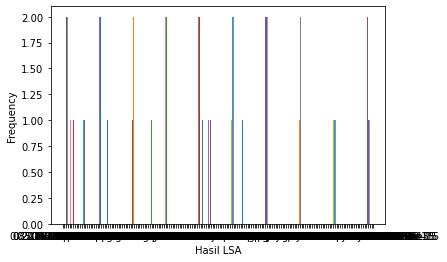

In [ ]:
plt.hist(hasil_LSA)
plt.xlabel('Hasil LSA')
plt.ylabel('Frequency')
plt.show

In [ ]:
# len(svd_model.components_)
# len(svd_model.fit_transform(X))

### Topic Visualisation

Loading Topic Visualisation...


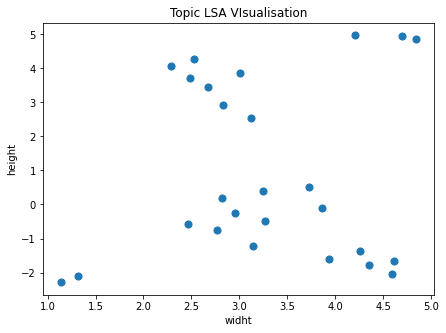

done in 1.100s.


In [ ]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

topic_lsa = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(topic_lsa)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.title('Topic LSA VIsualisation')
plt.xlabel('widht')
plt.ylabel('height')
plt.show()

print("done in %0.3fs." % (time() - t0))

<function matplotlib.pyplot.show>

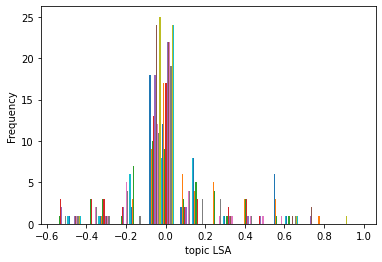

In [ ]:
plt.hist(topic_lsa)
plt.xlabel('topic LSA')
plt.ylabel('Frequency')
plt.show

## Kmeans Clustering LSA

In [ ]:
import numpy as np
XLSA = np.array(svd_model.components_)
yLSA = np.array(topic_lsa)

In [ ]:
print("Loading Data X & Y...")
t0 = time()

print("X", XLSA, "\n")
print("Y", yLSA, "\n")

print("done in %0.3fs." % (time() - t0))

Loading Data X & Y...
X [[ 3.13451948e-03  6.88350778e-03  1.04130496e-02 ...  2.06247695e-01
   1.24442311e-02  4.62193987e-03]
 [ 2.56435442e-02  5.55499806e-02  1.09247139e-02 ... -1.31262699e-02
   3.05536061e-02  3.69511648e-02]
 [ 3.57652406e-02  7.73560119e-02  1.50072894e-02 ... -1.74403555e-02
   4.35789082e-02  5.14008936e-02]
 ...
 [ 1.07476301e-02  4.97056991e-03 -2.30400615e-03 ...  7.34066690e-03
   3.96725368e-04 -5.14670331e-03]
 [-2.57774455e-01  6.78116362e-02  2.15504328e-03 ...  3.33721650e-02
   5.89974262e-04  3.34185816e-01]
 [-1.20527608e-15  3.17549545e-16 -9.55736860e-16 ...  1.11292670e-16
  -1.05371133e-16  1.77516083e-15]] 

Y [[ 2.00064442e-02  2.84444564e-01  4.68530783e-01  4.28259093e-01
  -3.00672654e-02  0.00000000e+00  5.28505783e-02 -9.54195664e-02
  -0.00000000e+00  8.27814522e-02  2.25283942e-01  1.56128209e-01
   8.41971234e-02  4.18000601e-01  0.00000000e+00  0.00000000e+00
   2.23612512e-15 -2.26583577e-02 -9.22909278e-02 -0.00000000e+00]
 [ 6.

In [ ]:
from sklearn.cluster import KMeans

print("Loading Kmeans...")
t0 = time()
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
print(kmeans.fit(XLSA))

print("done in %0.3fs." % (time() - t0))

Loading Kmeans...
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
done in 0.024s.


In [ ]:
print("Loading Data Correction...")
t0 = time()

correct = 0
for i in range(len(XLSA)):
    predict_me = np.array(XLSA[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == yLSA[i].all():
        correct += 1

print(correct/len(XLSA))

print("done in %0.3fs." % (time() - t0))

Loading Data Correction...
0.05
done in 0.016s.


In [ ]:
from sklearn.preprocessing import MinMaxScaler


print("Loading X Scaled...")
t0 = time()

scaler = MinMaxScaler()
XLSA_scaled = scaler.fit_transform(XLSA)

print(XLSA_scaled)

print("done in %0.3fs." % (time() - t0))

Loading X Scaled...
[[0.86822798 0.7461405  0.5092903  ... 0.65772349 0.68882049 0.27693733]
 [0.94313137 0.92144925 0.51132199 ... 0.46190276 0.76198481 0.3478676 ]
 [0.97681338 1.         0.52753289 ... 0.45805185 0.81460879 0.37957029]
 ...
 [0.89356217 0.73924962 0.45879402 ... 0.48017225 0.64014695 0.25550494]
 [0.         0.96561878 0.4764998  ... 0.50340886 0.6409277  1.        ]
 [0.85779723 0.72134439 0.46794265 ... 0.47361971 0.63854412 0.2667968 ]]
done in 0.002s.


In [ ]:
print("Loading Correction...")
t0 = time()

print("X", XLSA, "\n")
print("X scaled", XLSA_scaled, "\n")

print("done in %0.3fs." % (time() - t0))

Loading Correction...
X [[ 3.13451948e-03  6.88350778e-03  1.04130496e-02 ...  2.06247695e-01
   1.24442311e-02  4.62193987e-03]
 [ 2.56435442e-02  5.55499806e-02  1.09247139e-02 ... -1.31262699e-02
   3.05536061e-02  3.69511648e-02]
 [ 3.57652406e-02  7.73560119e-02  1.50072894e-02 ... -1.74403555e-02
   4.35789082e-02  5.14008936e-02]
 ...
 [ 1.07476301e-02  4.97056991e-03 -2.30400615e-03 ...  7.34066690e-03
   3.96725368e-04 -5.14670331e-03]
 [-2.57774455e-01  6.78116362e-02  2.15504328e-03 ...  3.33721650e-02
   5.89974262e-04  3.34185816e-01]
 [-1.20527608e-15  3.17549545e-16 -9.55736860e-16 ...  1.11292670e-16
  -1.05371133e-16  1.77516083e-15]] 

X scaled [[0.86822798 0.7461405  0.5092903  ... 0.65772349 0.68882049 0.27693733]
 [0.94313137 0.92144925 0.51132199 ... 0.46190276 0.76198481 0.3478676 ]
 [0.97681338 1.         0.52753289 ... 0.45805185 0.81460879 0.37957029]
 ...
 [0.89356217 0.73924962 0.45879402 ... 0.48017225 0.64014695 0.25550494]
 [0.         0.96561878 0.476499

Loading Topic Visualisation...


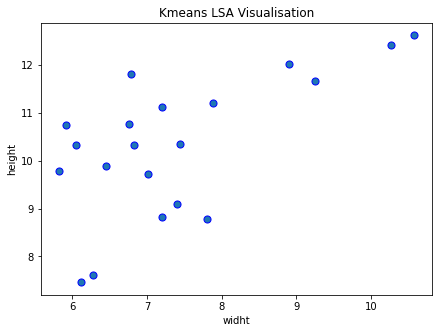

done in 0.776s.


In [ ]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

kmeans_lsa = XLSA_scaled
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(kmeans_lsa)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors='Blue')
plt.title('Kmeans LSA Visualisation')
plt.xlabel('widht')
plt.ylabel('height')
plt.show()

print("done in %0.3fs." % (time() - t0))

<function matplotlib.pyplot.show>

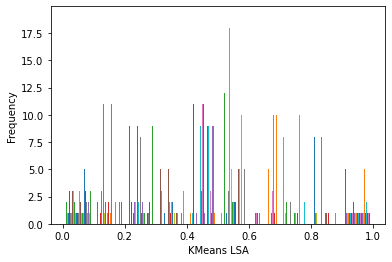

In [ ]:
plt.hist(kmeans_lsa)
plt.xlabel('KMeans LSA')
plt.ylabel('Frequency')
plt.show

### Splitting Data

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(XLSA, kmeans_lsa, test_size=0.3,random_state=109) # 70% training and 30% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14, 93), (6, 93), (14, 93), (6, 93))

In [ ]:
y_train = np.argmax(y_train, axis=1)

### Model Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_predLR = clf.predict(X_test)

# Decision Tree
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
y_predDT = Dt.predict(X_test)

# Decision Tree Regressor
Dtr = DecisionTreeRegressor()
Dtr.fit(X_train, y_train)
y_predDTR = Dtr.predict(X_test)

# Gaussian Naive Bias
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predGNB = gnb.predict(X_test)

# random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predRFC = rfc.predict(X_test)

# random forest regressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
y_predRFR = rfr.predict(X_test)

# Support vector classifier
ppn = SVC(C=1, random_state = 0)
ppn.fit(X_train,y_train)
y_predSVC = ppn.predict(X_test)

# support vector regression
svm = SVR(C = 2, kernel = 'rbf', degree = 2)
svm.fit(X_train, y_train)
y_predSVR = svm.predict(X_test)

# k neearest neighbor classifier
Knn = KNeighborsClassifier(n_neighbors = 2, p =2, metric = 'minkowski')
Knn = Knn.fit(X_train,y_train)
y_predKNN = Knn.predict(X_test)

In [ ]:
print("prediksi logistic regression", y_predLR)
print("prediksi Decision Tree", y_predDT)
print("prediksi Decision Tree Regression", y_predDTR)
print("prediksi Gaussian Naive Bias", y_predGNB)
print("prediksi random forest classifer", y_predRFC)
print("prediksi random forest regressor", y_predRFR)
print("prediksi support vector classifer", y_predSVC)
print("prediksi support vector regression", y_predSVR)
print("prediksi k nearest neighbor classifer", y_predKNN)

prediksi logistic regression [ 4 90 57 18  8 24]
prediksi Decision Tree [24 90 57  6 57 24]
prediksi Decision Tree Regression [20. 90. 20. 20. 20. 20.]
prediksi Gaussian Naive Bias [ 4  6  4 18 18  8]
prediksi random forest classifer [24 20 57  2 24  2]
prediksi random forest regressor [30.86 45.34 36.68 34.82 35.57 37.15]
prediksi support vector classifer [18  8  4  1  4  4]
prediksi support vector regression [13. 13. 13. 13. 13. 13.]
prediksi k nearest neighbor classifer [8 6 2 1 4 4]


### Model Evaluation

In [ ]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# actual = [6, 36, 17, 10, 19, 19]
# actual = [4, 14, 12, 12, 8, 6]
actual = [4, 90, 20, 18, 8, 4]

# predicted = y_predLR
# predicted = y_predDT
# predicted = y_predDTR
# predicted = y_predGNB
# predicted = y_predRFC
# predicted = y_predRFR
predicted = y_predSVC
# predicted = y_predSVR
# predicted = y_predKNN

results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results,'\n') 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 

print ('Report : ')
print (classification_report(actual, predicted)) 

Confusion Matrix :
[[0 0 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]] 

Accuracy Score : 0.16666666666666666
Report : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           4       0.33      0.50      0.40         2
           8       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         1

    accuracy                           0.17         6
   macro avg       0.06      0.08      0.07         6
weighted avg       0.11      0.17      0.13         6



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Latent Dirichlet Allocation

### Import Library

In [ ]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

### Load dataset

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data = cleaned_text
# data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
#                              remove=('headers', 'footers', 'quotes'),
#                              return_X_y=True)
data_samples = data[:n_samples]
print(data_samples)
print("done in %0.3fs." % (time() - t0))

Loading dataset...
['user creat new diari', 'user add titl diari', 'user add weather diari', 'user add date diari', 'user add hour diari', 'user add second diari', 'user save diari', 'user add photo diari', 'user read diari ha creat', 'user share diari form postcard', 'user save postcard', 'user chang postcard background color', 'user chang color post postcard', 'user delet diari', 'user edit diari ha creat', 'user open calendar contain diari', 'system open diari editor', 'applic ha high level avail oper continu seven day per week hour per day without stop', 'applic must high degre flexibilitywhich must abl run devic use kitkat version android oper system abov', 'thi applic must high level integr data secur includ secur form password user', 'thi applic ha high usabl aspect easi use interfac applic introduc two hoursth new user creat diari less three minut', 'thi applic must respons time valu quit good fast access extend perform result toler three second', 'applic must high level intero

In [ ]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print(tfidf)
print("done in %0.3fs." % (time() - t0))

Extracting tf-idf features for NMF...
  (0, 8)	0.3288983191694328
  (0, 15)	0.6903417501591423
  (0, 6)	0.580044757687454
  (0, 24)	0.280717371592919
  (1, 1)	0.7611076249228439
  (1, 8)	0.49335826879486444
  (1, 24)	0.4210852667762693
  (2, 1)	0.7611076249228439
  (2, 8)	0.49335826879486444
  (2, 24)	0.4210852667762693
  (3, 1)	0.7611076249228439
  (3, 8)	0.49335826879486444
  (3, 24)	0.4210852667762693
  (4, 12)	0.7193414627020884
  (4, 1)	0.5287084722779107
  (4, 8)	0.3427146017708732
  (4, 24)	0.29250968037350394
  (5, 20)	0.7193414627020884
  (5, 1)	0.5287084722779107
  (5, 8)	0.3427146017708732
  (5, 24)	0.29250968037350394
  (6, 19)	0.8474770401085553
  (6, 8)	0.40376201202105216
  (6, 24)	0.344614138040728
  (7, 1)	0.7611076249228439
  :	:
  (20, 15)	0.3901562820147368
  (20, 6)	0.32782039621579584
  (20, 24)	0.15865134329829308
  (21, 22)	0.5682222250880776
  (21, 2)	0.4688079114938321
  (21, 20)	0.6762711327838453
  (22, 22)	0.4384477883362798
  (22, 14)	0.40869104530446076
 

In [ ]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print(tf)
print("done in %0.3fs." % (time() - t0))

Extracting tf features for LDA...
  (0, 24)	1
  (0, 6)	1
  (0, 15)	1
  (0, 8)	1
  (1, 24)	1
  (1, 8)	1
  (1, 1)	1
  (2, 24)	1
  (2, 8)	1
  (2, 1)	1
  (3, 24)	1
  (3, 8)	1
  (3, 1)	1
  (4, 24)	1
  (4, 8)	1
  (4, 1)	1
  (4, 12)	1
  (5, 24)	1
  (5, 8)	1
  (5, 1)	1
  (5, 20)	1
  (6, 24)	1
  (6, 8)	1
  (6, 19)	1
  (7, 24)	1
  :	:
  (20, 11)	1
  (20, 23)	1
  (20, 22)	1
  (21, 20)	1
  (21, 2)	1
  (21, 22)	1
  (22, 2)	2
  (22, 11)	1
  (22, 14)	1
  (22, 22)	1
  (23, 3)	1
  (23, 11)	1
  (23, 14)	1
  (23, 13)	1
  (24, 24)	1
  (24, 2)	1
  (24, 11)	1
  (24, 21)	1
  (24, 7)	1
  (24, 23)	1
  (24, 0)	1
  (25, 11)	1
  (25, 14)	1
  (25, 5)	1
  (25, 23)	1
done in 0.003s.


In [ ]:
# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.022s.

Topics in NMF model (Frobenius norm):
Topic #0: add diari user hour second form thi applic chang color continu creat degre seven ha save high use includ level
Topic #1: abov degre use applic high oper seven user open second add thi chang color continu creat diari new form ha
Topic #2: color chang postcard user high add applic continu creat degre diari form ha hour use includ level new open oper
Topic #3: creat ha diari user new use applic add chang color continu degre form hour high includ level open oper postcard
Topic #4: open diari user high add applic chang color continu creat degre form ha hour use includ level new oper postcard
Topic #5: applic thi second high level new form user add chang color continu creat degre diari hour ha use includ open
Topic #6: save user postcard diari ha add applic chang color continu creat degre form hour high use includ level new open
T

In [ ]:
model_nmf = nmf
feature_names = tfidf_feature_names
n_top_words = n_top_words

for topic_idx, topic in enumerate(model_nmf.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

Topic #0: add diari user hour second form thi applic chang color continu creat degre seven ha save high use includ level
Topic #1: abov degre use applic high oper seven user open second add thi chang color continu creat diari new form ha
Topic #2: color chang postcard user high add applic continu creat degre diari form ha hour use includ level new open oper
Topic #3: creat ha diari user new use applic add chang color continu degre form hour high includ level open oper postcard
Topic #4: open diari user high add applic chang color continu creat degre form ha hour use includ level new oper postcard
Topic #5: applic thi second high level new form user add chang color continu creat degre diari hour ha use includ open
Topic #6: save user postcard diari ha add applic chang color continu creat degre form hour high use includ level new open
Topic #7: includ level high chang form thi applic user add color continu creat degre diari hour ha use new open oper
Topic #8: continu level high use hour 

<function matplotlib.pyplot.show>

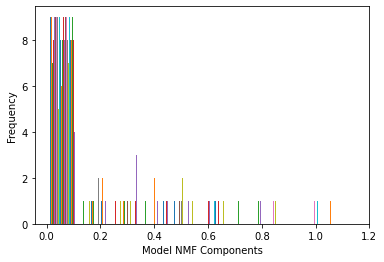

In [ ]:
plt.hist(model_nmf.components_)
plt.xlabel('Model NMF Components')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show>

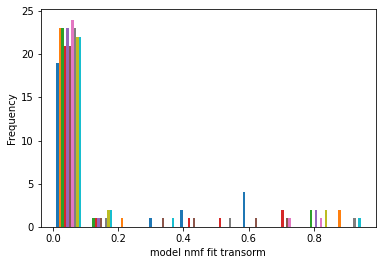

In [ ]:
plt.hist(model_nmf.fit_transform(tfidf_vectorizer.fit_transform(cleaned_text)))
plt.xlabel('model nmf fit transorm')
plt.ylabel('Frequency')
plt.show

In [ ]:
# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.093s.

Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: diari add user high applic chang color continu creat degre form ha hour use includ level new open oper postcard
Topic #1: use high applic oper abov degre seven continu level form add chang color creat diari user ha includ new open
Topic #2: chang postcard color user high add applic continu creat degre diari form ha hour use includ level new open oper
Topic #3: creat ha diari new user high add applic chang color continu degre form hour use includ level open oper postcard
Topic #4: open diari user high add applic chang color continu creat degre form ha hour use includ level new oper postcard
Topic #5: applic thi second user ha add chang color continu creat degre diari form hour high use includ level new open
Topic #6: save abov degre seven user oper use applic second diari add 

In [ ]:
model_lda = lda
feature_names = tfidf_feature_names
n_top_words = n_top_words

for topic_idx, topic in enumerate(model_lda.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

Topic #0: applic high level oper abov ha thi seven continu degre second use open diari hour add creat includ form user
Topic #1: use second level includ continu seven hour creat new color postcard user applic oper diari abov degre open form high
Topic #2: ha seven high includ chang save level add degre new use continu open applic postcard color hour abov diari second
Topic #3: diari user add open second hour level save creat thi abov color chang degre form includ ha use continu oper
Topic #4: user diari ha creat applic high postcard new use save seven degre form abov thi level second add continu open
Topic #5: second thi new applic open color chang ha save hour user oper high diari postcard abov includ level add creat
Topic #6: open form color high includ save creat continu seven add postcard chang degre thi applic second new level use ha
Topic #7: color postcard user chang new save level creat add diari form degre applic hour continu use second seven includ ha
Topic #8: thi diari leve

<function matplotlib.pyplot.show>

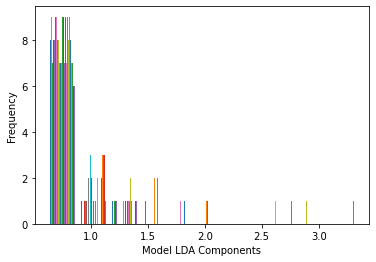

In [ ]:
plt.hist(model_lda.components_)
plt.xlabel('Model LDA Components')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show>

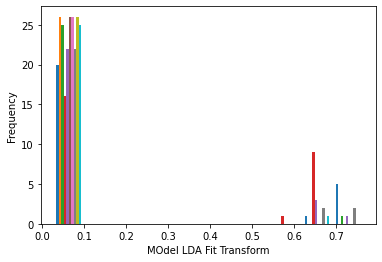

In [ ]:
plt.hist(model_lda.fit_transform(tfidf_vectorizer.fit_transform(cleaned_text)))
plt.xlabel('MOdel LDA Fit Transform')
plt.ylabel('Frequency')
plt.show

In [ ]:
# len(model.components_)
# len(data_samples)
# len(model.fit_transform(vectorizer.fit_transform(cleaned_text)))
# len(model.fit_transform(vectorizer.fit_transform(model.components_)))
# len(model.fit_transform(vectorizer.fit_transform(data_samples)))

# len(nmf.components_)
# len(model.fit_transform(nmf.components_))

### Topic Visualisation

Loading Topic Visualisation...


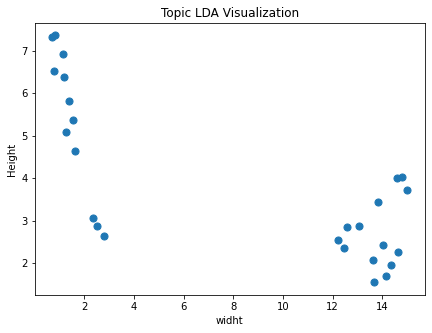

done in 0.806s.


In [ ]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

topic_lda = tf
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(topic_lda)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors=None)
plt.title('Topic LDA Visualization')
plt.xlabel('widht')
plt.ylabel('Height')
plt.show()

print("done in %0.3fs." % (time() - t0))

## Kmeans Clustering LDA

In [ ]:
import numpy as np
XLDA = np.array(model_lda.components_)
yLDA = np.array(model_lda.fit_transform(model_lda.components_))

In [ ]:
print("Loading Data X & Y...")
t0 = time()

print("X", XLDA, "\n")
print("Y", yLDA, "\n")

print("done in %0.3fs." % (time() - t0))

Loading Data X & Y...
X [[1.13924605 0.8834537  1.24858232 0.68218711 0.74324957 0.92721692
  0.80725571 1.01261206 0.89262673 0.83145245 0.95676322 1.05289823
  0.69093688 0.85540123 1.10791895 0.65036905 0.95625662 1.09999268
  0.68827518 0.61648041 0.91613008 1.07665834 0.77859659 0.89589489
  0.8634334 ]
 [0.71942444 0.63997389 0.73540432 0.68775008 0.77909644 0.77846923
  0.78218557 0.70571175 0.72475793 0.69337689 0.63270695 0.65847644
  0.78475209 0.80481943 0.78343423 0.78024404 0.70221961 0.72836256
  0.75478443 0.66953312 0.81795132 0.78496336 0.64501827 0.86455628
  0.7377681 ]
 [0.72188201 0.84294267 0.77683419 0.95038401 0.75993562 0.7802179
  0.66251075 0.823229   0.72116528 0.69789107 0.89461667 0.92457791
  0.73145992 0.97224079 0.92285554 0.81959204 0.77832303 0.67393852
  0.77252999 0.8511185  0.719634   0.89311744 0.69634768 0.7904796
  0.70562698]
 [0.80082112 1.76384661 0.72823224 0.76284712 0.79769123 0.68656457
  0.83468914 0.74576771 1.94665113 0.80749889 0.7036

In [ ]:
from sklearn.cluster import KMeans

print("Loading Kmeans...")
t0 = time()
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
print(kmeans.fit(XLDA))

print("done in %0.3fs." % (time() - t0))

Loading Kmeans...
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
done in 0.023s.


In [ ]:
print("Loading Data Correction...")
t0 = time()

correct = 0
for i in range(len(XLDA)):
    predict_me = np.array(XLDA[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == yLDA[i].all():
        correct += 1

print(correct/len(XLDA))

print("done in %0.3fs." % (time() - t0))

Loading Data Correction...
0.1
done in 0.005s.


In [ ]:
from sklearn.preprocessing import MinMaxScaler


print("Loading X Scaled...")
t0 = time()

scaler = MinMaxScaler()
XLDA_scaled = scaler.fit_transform(XLDA)

print(XLDA_scaled)

print("done in %0.3fs." % (time() - t0))

Loading X Scaled...
[[1.         0.21664357 1.         0.13050418 0.17711382 1.
  0.28220093 1.         0.19745387 0.63411694 0.46260851 1.
  0.05581676 0.57765728 1.         0.         0.58207306 1.
  0.09208196 0.         0.90964718 1.         0.46950814 1.
  0.18945878]
 [0.19257583 0.         0.04167002 0.14801837 0.2672757  0.45881948
  0.23332313 0.         0.06963666 0.14922623 0.         0.
  0.44810594 0.39481803 0.15130212 0.36823327 0.06859676 0.20793435
  0.20602154 0.12183599 0.4580899  0.33625286 0.         0.84474261
  0.0385879 ]
 [0.19730237 0.18059766 0.11903788 0.97488242 0.2190825  0.46518156
  0.         0.38291668 0.06690118 0.16507901 0.37389083 0.6746622
  0.22526422 1.         0.51596201 0.47979627 0.22242199 0.09193887
  0.23642215 0.53884833 0.00589533 0.5823557  0.18041531 0.47775274
  0.        ]
 [0.34912243 1.         0.02827657 0.38445027 0.31404524 0.1244478
  0.33568632 0.1305178  1.         0.54999735 0.10133485 0.11741381
  1.         0.16531511 0.56

In [ ]:
print("Loading Correction...")
t0 = time()

print("X", XLDA, "\n")
print("X scaled", XLDA_scaled, "\n")

print("done in %0.3fs." % (time() - t0))

Loading Correction...
X [[1.13924605 0.8834537  1.24858232 0.68218711 0.74324957 0.92721692
  0.80725571 1.01261206 0.89262673 0.83145245 0.95676322 1.05289823
  0.69093688 0.85540123 1.10791895 0.65036905 0.95625662 1.09999268
  0.68827518 0.61648041 0.91613008 1.07665834 0.77859659 0.89589489
  0.8634334 ]
 [0.71942444 0.63997389 0.73540432 0.68775008 0.77909644 0.77846923
  0.78218557 0.70571175 0.72475793 0.69337689 0.63270695 0.65847644
  0.78475209 0.80481943 0.78343423 0.78024404 0.70221961 0.72836256
  0.75478443 0.66953312 0.81795132 0.78496336 0.64501827 0.86455628
  0.7377681 ]
 [0.72188201 0.84294267 0.77683419 0.95038401 0.75993562 0.7802179
  0.66251075 0.823229   0.72116528 0.69789107 0.89461667 0.92457791
  0.73145992 0.97224079 0.92285554 0.81959204 0.77832303 0.67393852
  0.77252999 0.8511185  0.719634   0.89311744 0.69634768 0.7904796
  0.70562698]
 [0.80082112 1.76384661 0.72823224 0.76284712 0.79769123 0.68656457
  0.83468914 0.74576771 1.94665113 0.80749889 0.7036

Loading Topic Visualisation...


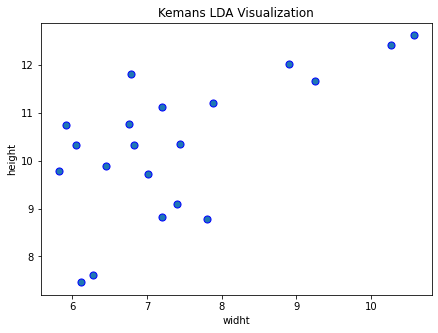

done in 0.963s.


In [ ]:
import umap

print("Loading Topic Visualisation...")
t0 = time()

kmeans_lda = XLDA_scaled
embedding = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=4).fit_transform(kmeans_lsa)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], c = None, s = 50 ,edgecolors='Blue')
plt.title("Kemans LDA Visualization")
plt.xlabel('widht')
plt.ylabel('height')
plt.show
plt.show()

print("done in %0.3fs." % (time() - t0))

<function matplotlib.pyplot.show>

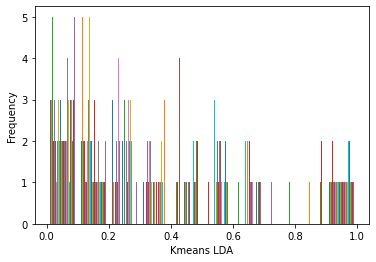

In [ ]:
plt.hist(kmeans_lda)
plt.xlabel('Kmeans LDA')
plt.ylabel('Frequency')
plt.show

### Splitting Data

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(XLDA, kmeans_lda, test_size=0.3,random_state=109) # 70% training and 30% test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7, 25), (3, 25), (7, 25), (3, 25))

In [ ]:
print("X train", X_train)
print("X test", X_test)
print("y train", y_train)
print("X test", y_test)

X train [[0.71942444 0.63997389 0.73540432 0.68775008 0.77909644 0.77846923
  0.78218557 0.70571175 0.72475793 0.69337689 0.63270695 0.65847644
  0.78475209 0.80481943 0.78343423 0.78024404 0.70221961 0.72836256
  0.75478443 0.66953312 0.81795132 0.78496336 0.64501827 0.86455628
  0.7377681 ]
 [0.80082112 1.76384661 0.72823224 0.76284712 0.79769123 0.68656457
  0.83468914 0.74576771 1.94665113 0.80749889 0.7036918  0.70478701
  0.91673652 0.74132829 0.94034999 0.66550394 1.16302158 0.68062933
  0.67621618 1.05192408 0.93577483 0.67832871 0.84483248 0.69404551
  1.53855969]
 [1.13924605 0.8834537  1.24858232 0.68218711 0.74324957 0.92721692
  0.80725571 1.01261206 0.89262673 0.83145245 0.95676322 1.05289823
  0.69093688 0.85540123 1.10791895 0.65036905 0.95625662 1.09999268
  0.68827518 0.61648041 0.91613008 1.07665834 0.77859659 0.89589489
  0.8634334 ]
 [0.65745455 0.80215024 0.7392082  0.95836202 1.07041545 0.72317494
  0.78623641 0.74624506 0.7962408  0.84845508 0.68805863 0.6700562

In [ ]:
y_train = np.argmax(y_train, axis=1)

### Model Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_predLR = clf.predict(X_test)

# Decision Tree
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)
y_predDT = Dt.predict(X_test)

# Decision Tree Regressor
Dtr = DecisionTreeRegressor()
Dtr.fit(X_train, y_train)
y_predDTR = Dtr.predict(X_test)

# Gaussian Naive Bias
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predGNB = gnb.predict(X_test)

# random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_predRFC = rfc.predict(X_test)

# random forest regressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
y_predRFR = rfr.predict(X_test)

# Support vector classifier
ppn = SVC(C=1, random_state = 0)
ppn.fit(X_train,y_train)
y_predSVC = ppn.predict(X_test)

# support vector regression
svm = SVR(C = 2, kernel = 'rbf', degree = 2)
svm.fit(X_train, y_train)
y_predSVR = svm.predict(X_test)

# k neearest neighbor classifier
Knn = KNeighborsClassifier(n_neighbors = 2, p =2, metric = 'minkowski')
Knn = Knn.fit(X_train,y_train)
y_predKNN = Knn.predict(X_test)

In [ ]:
print("prediksi logistic regression", y_predLR)
print("prediksi Decision Tree", y_predDT)
print("prediksi Decision Tree Regression", y_predDTR)
print("prediksi Gaussian Naive Bias", y_predGNB)
print("prediksi random forest classifer", y_predRFC)
print("prediksi random forest regressor", y_predRFR)
print("prediksi support vector classifer", y_predSVC)
print("prediksi support vector regression", y_predSVR)
print("prediksi k nearest neighbor classifer", y_predKNN)

prediksi logistic regression [22 22 22]
prediksi Decision Tree [22  9  1]
prediksi Decision Tree Regression [23. 18. 22.]
prediksi Gaussian Naive Bias [22 22 22]
prediksi random forest classifer [22 22 23]
prediksi random forest regressor [17.94 15.85 15.72]
prediksi support vector classifer [22 22 22]
prediksi support vector regression [18.60724939 17.45024725 18.76016895]
prediksi k nearest neighbor classifer [ 9 22 22]


### Model Evaluation

In [ ]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# actual = [3, 0, 1]
# actual = [2 , 0, 0]
actual = [0 , 0, 0]

# predicted = y_predLR
# predicted = y_predDT
# predicted = y_predDTR
# predicted = y_predGNB
# predicted = y_predRFC
# predicted = y_predSVC
predicted = y_predKNN
results = confusion_matrix(actual, predicted) 

print ('Confusion Matrix :')
print(results,'\n') 
print ('Accuracy Score :',accuracy_score(actual, predicted)) 

print ('Report : ')
print (classification_report(actual, predicted)) 



Confusion Matrix :
[[0 1 2]
 [0 0 0]
 [0 0 0]] 

Accuracy Score : 0.0
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           9       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
